In [1]:
import numpy as np
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [3]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


**Preprocessing the data**

In [4]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
train_data, val_data, train_label, val_label = train_test_split(X_train, y_train, test_size = 0.3, shuffle=False)

In [7]:
train_label.shape

(35000, 10)

In [8]:
train_data_generator = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

In [9]:
val_data_generator = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True)

In [10]:
train_data_generator.fit(train_data)
val_data_generator.fit(val_data)

In [11]:
from tensorflow.keras.applications import ResNet50

**ResNet50 as basemodel (Transfer Learning)**

In [12]:
base_model = ResNet50(include_top=False, input_shape=(32,32,3),classes=y_train.shape[1])

94781440/94765736 [==============================] - 1s 0us/step


In [13]:
model = tf.keras.Sequential()
model.add(base_model)
model.add(tf.keras.layers.Flatten())

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
Total params: 23,587,712
Trainable params: 23,534,592
Non-trainable params: 53,120
_________________________________________________________________


In [15]:
model.add(tf.keras.layers.Dense(1024, activation='relu', input_shape=(32,32,3)))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 10)                1

In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
batch_size=32
epochs = 10

In [19]:
train_data.shape[0]//batch_size

1093

In [20]:
val_data.shape[0]//(batch_size*2)

234

**Fit the model**

In [21]:
model.fit_generator(train_data_generator.flow(train_data, train_label, batch_size=batch_size),
                    epochs=epochs,
                    steps_per_epoch=train_data.shape[0]//batch_size,
                    validation_data=val_data_generator.flow(val_data, val_label, batch_size=batch_size),
                    validation_steps=250,
                    )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
1093/1093 [==============================] - 142s 115ms/step - loss: 1.7169 - accuracy: 0.3765 - val_loss: 1.9454 - val_accuracy: 0.3550
Epoch 2/10
1093/1093 [==============================] - 123s 113ms/step - loss: 1.4728 - accuracy: 0.4774 - val_loss: 1.3116 - val_accuracy: 0.5261
Epoch 3/10
1093/1093 [==============================] - 120s 110ms/step - loss: 1.4223 - accuracy: 0.4970 - val_loss: 1.3850 - val_accuracy: 0.5281
Epoch 4/10
1093/1093 [==============================] - 120s 110ms/step - loss: 1.2808 - accuracy: 0.5561 - val_loss: 1.5140 - val_accuracy: 0.5211
Epoch 5/10
1093/1093 [==============================] - 124s 114ms/step - loss: 1.2345 - accuracy: 0.5772 - val_loss: 1.3210 - val_accuracy: 0.5683
Epoch 6/10
1093/1093 [==============================] - 120s 110ms/step - loss: 1.2286 - accuracy: 0.5773 - val_loss: 1.7537 - val_accuracy: 0.5132
Epoch 7/10
1093/1093 [==============================] - 120s 110ms/step - loss: 1.2432 - accuracy: 0.5703 - val_

**Evaluate**

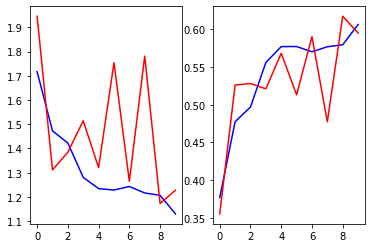

In [25]:
f,ax=plt.subplots(1,2) #Creates 2 subplots under 1 column

#Assign the first subplot to graph training loss and validation loss
ax[0].plot(model.history.history['loss'],color='b',label='Training Loss')
ax[0].plot(model.history.history['val_loss'],color='r',label='Validation Loss')

#Next lets plot the training accuracy and validation accuracy
ax[1].plot(model.history.history['accuracy'],color='b',label='Training  Accuracy')
ax[1].plot(model.history.history['val_accuracy'],color='r',label='Validation Accuracy')

Although the validation loss and accuracy were variating alongside the respective training loss and accuracy, it seems to be little underfitting. We need to try with optimal solutions (by training with differnt base model, loss function etc).